<div style="text-align: center; padding: 20px;">
    <span style="font-size: 24px; font-weight: bold; text-decoration: underline;">
        Data Integration Project: Data Visualization and K-Means
    </span>
</div>

<div style="text-align: center; font-size: 18px; line-height: 1.5;">
    Aurélien VERDIER, Inthushan SUTHAKARAN<br>
    2024/2025<br>
</div>
</div>
</div>
</div>
</div>

---



### Data Visualization  

For this data visualization section, we will load **only one matrix** from those generated.  
This matrix aligns with the goal of our project: **analyzing the financial profiles of movies**.  


In [3]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the csv file
df = pd.read_csv("../Data/Profils_Financiers_Films.csv")

In [5]:
# We check if there are missing values
df.isna().sum()

release_group           0
worldwide               0
avg_domestic_percent    0
avg_foreign_percent     0
rating                  0
vote_count              0
dtype: int64

In [6]:
# We check if there are duplicate lines
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4797 entries, 0 to 4796
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_group         4797 non-null   object 
 1   worldwide             4797 non-null   float64
 2   avg_domestic_percent  4797 non-null   float64
 3   avg_foreign_percent   4797 non-null   float64
 4   rating                4797 non-null   float64
 5   vote_count            4797 non-null   float64
dtypes: float64(5), object(1)
memory usage: 225.0+ KB


In [8]:
# Statistical data
df.describe()

,worldwide,avg_domestic_percent,avg_foreign_percent,rating,vote_count
count,4.797000e+03,4797.000000,4797.000000,4797.000000,4797.000000
mean,1.224244e+08,36.410277,63.588785,6.525416,2548.912028
std,2.038328e+08,30.471724,30.471149,0.904231,3954.272554
min,1.666028e+06,0.000000,0.000000,0.000000,0.000000
25%,2.521118e+07,0.500000,41.900000,6.018000,216.000000
50%,4.983061e+07,37.900000,62.100000,6.600000,1055.000000
75%,1.236816e+08,58.100000,99.500000,7.109000,3098.000000
max,2.799439e+09,100.000000,100.000000,9.700000,36753.000000


#### Numerical Variables Distribution  

Text(0.5, 1.0, 'Revenues distribution')

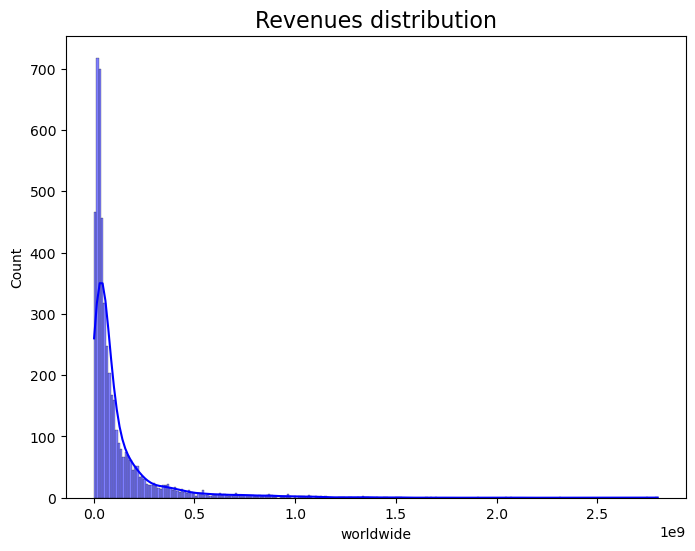

In [9]:
# The histogram below shows the distribution of movie revenues.  
# We observe that the distribution is asymmetric, with most movies generating less than 250 million dollars.  

plt.figure(figsize= (8,6))
sns.histplot(df["worldwide"], kde=True, bins = "auto", color='blue')
plt.title("Revenues distribution", fontsize = 16)

Text(0.5, 1.0, 'Distribution of ratings')

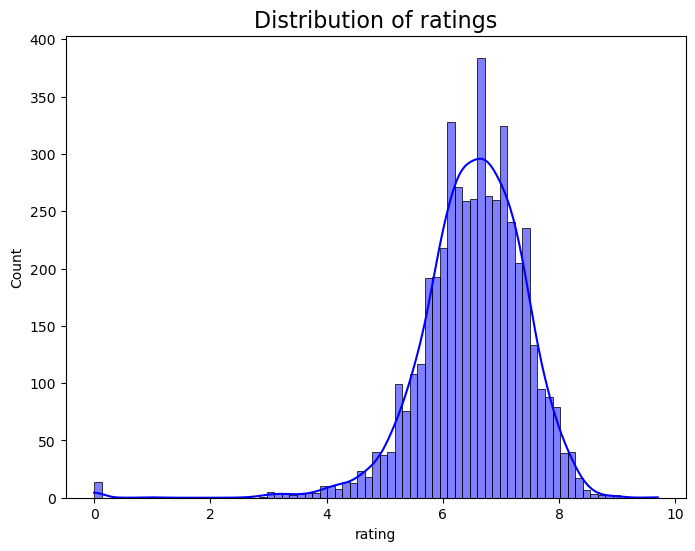

In [10]:
plt.figure(figsize= (8,6))
sns.histplot(df["rating"], kde=True, bins = "auto", color='blue')
plt.title("Distribution of ratings", fontsize = 16)

Text(0.5, 1.0, 'Distribution of the number of votes')

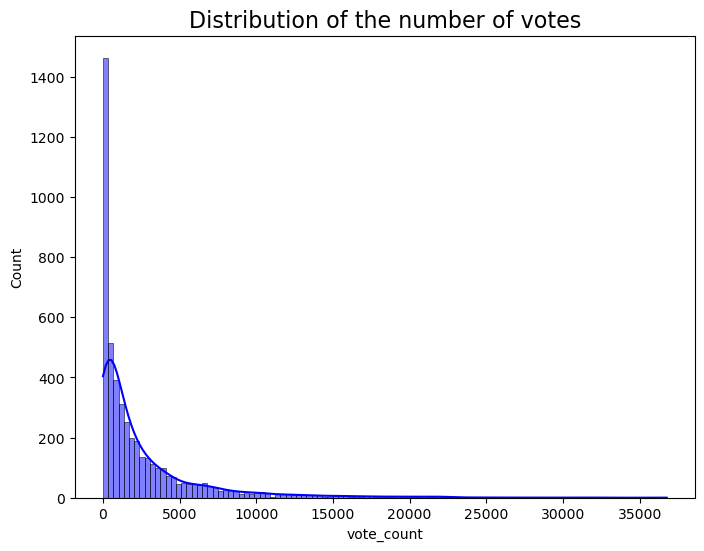

In [11]:
plt.figure(figsize= (8,6))
sns.histplot(df["vote_count"], kde=True, bins = "auto", color='blue')
plt.title("Distribution of the number of votes", fontsize = 16)

#### Relationship between variables

We can observe in the scatter plot below that, in general, movies have ratings between 4 and 8. Additionally, films that have generated the most revenue tend to have ratings above 6. However, some exceptions can be noted. For instance, there is a movie with a rating close to 10 but low revenue. This could be due to the film being less well-known despite its high quality.  


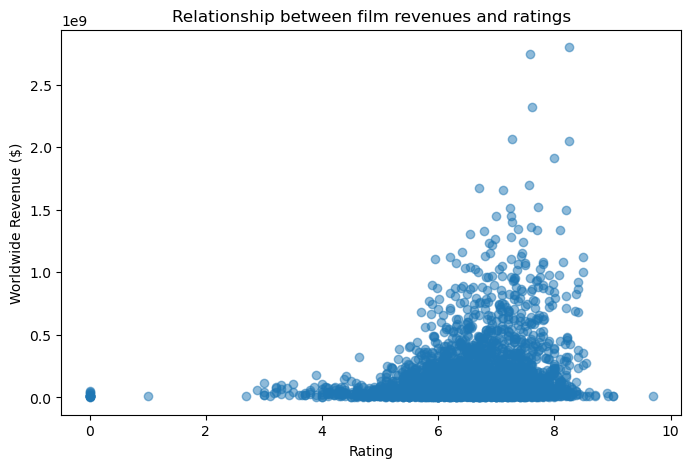

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(df["rating"], df["worldwide"], alpha=0.5)
plt.xlabel("Rating")
plt.ylabel("Worldwide Revenue ($)")
plt.title("Relationship between film revenues and ratings")

plt.show()

This graph allows us to verify the hypothesis stated earlier. Indeed, the movie with a rating of 10 has very few votes (similarly for the movie with a rating of 0).  


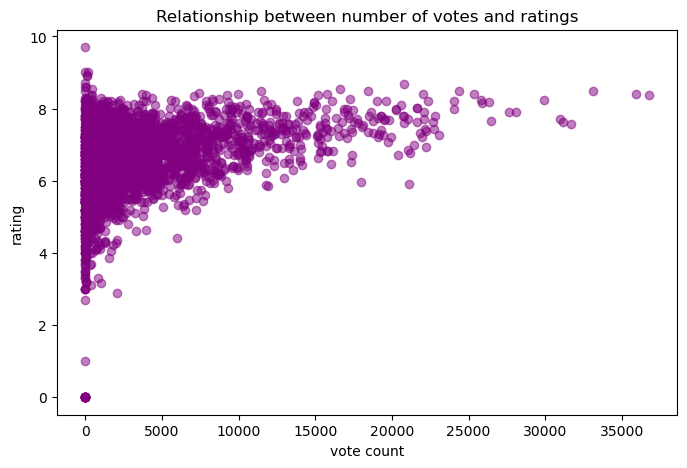

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(df["vote_count"], df["rating"], color = "purple", alpha=0.5)
plt.xlabel("vote count")
plt.ylabel("rating")
plt.title("Relationship between number of votes and ratings")
plt.show()

### K-Means  

In this section, we apply the **K-Means algorithm** to group movies into different clusters based on their **financial performance** and **ratings**.  
We analyze variables such as **global revenue**, **domestic and foreign revenue percentages**, **ratings**, and **number of votes**.  


In [14]:
# Importing the necessary libraries

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
# We only retrieve the numeric columns
data = df.iloc[:,1:]

# Normalize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#### Determining the Optimal Number of Clusters  

We use the **Elbow method** to determine the optimal number of clusters.  
Graphically, we observe that the optimal number is **3**, as beyond this point, the **inertia decreases much more slowly**.  


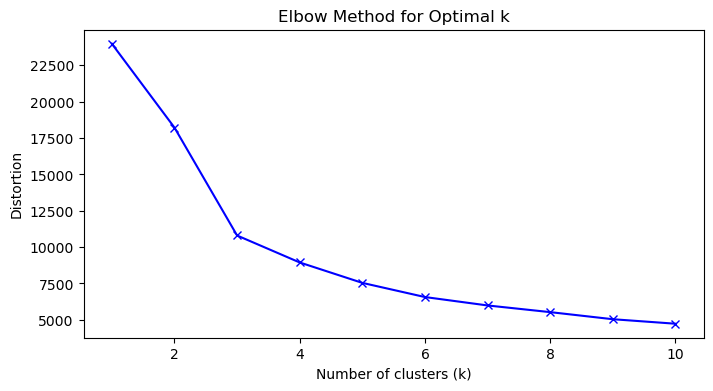

In [16]:
# Function to plot the elbow method
def plot_elbow_method(X, max_k=10):
    distortions = []
    K = range(1, max_k + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        # inertia_ method returns Within-Cluster Sum of Square (wcss) for that model
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

# Plot the elbow method to find the optimal number of clusters
plot_elbow_method(data_scaled)


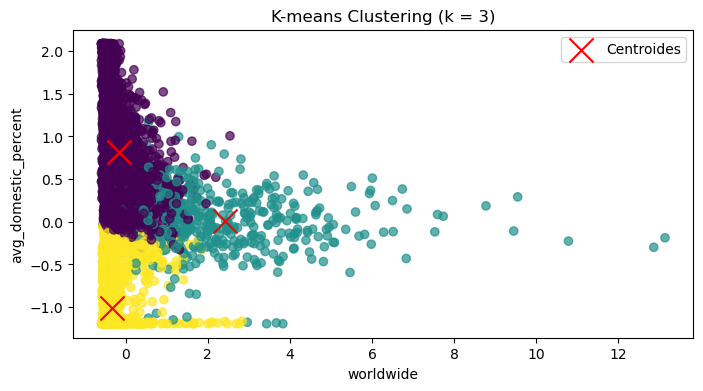

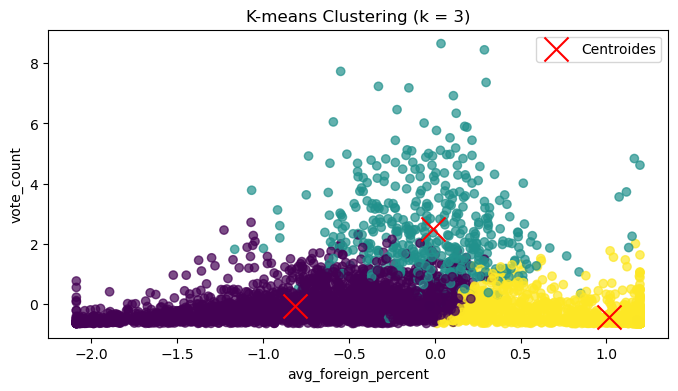

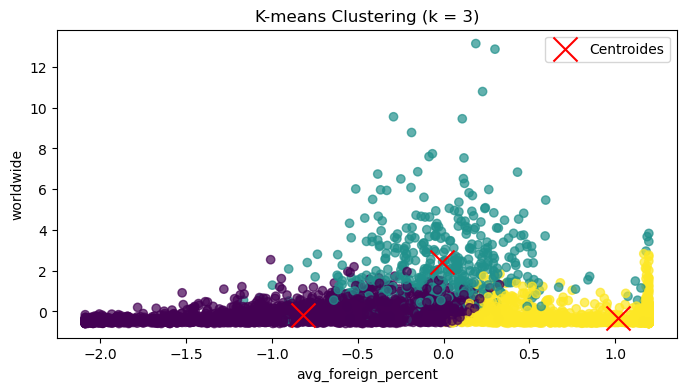

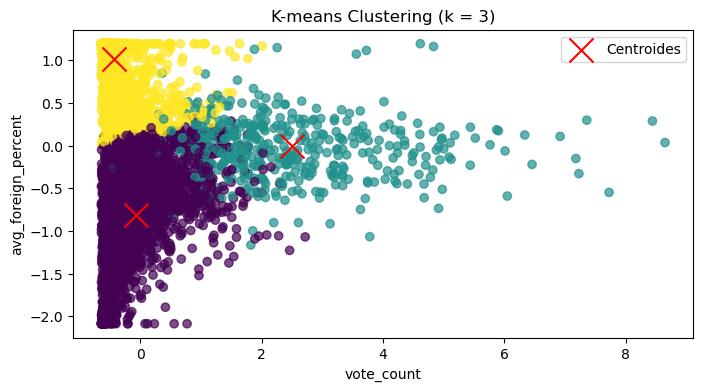

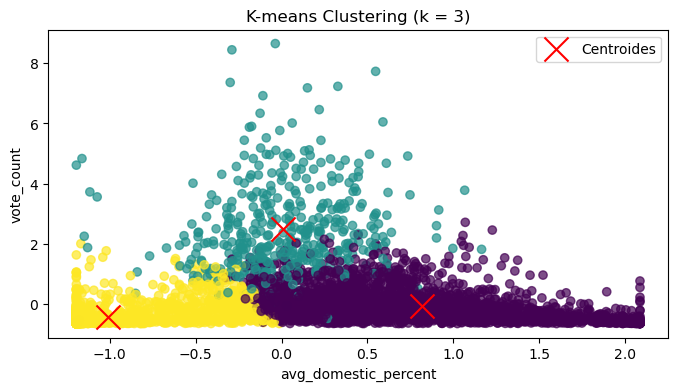

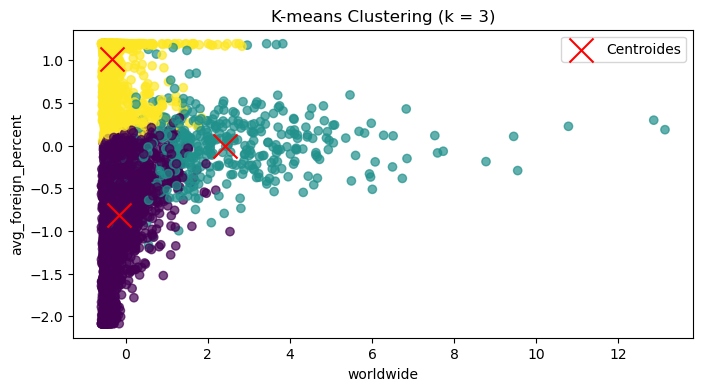

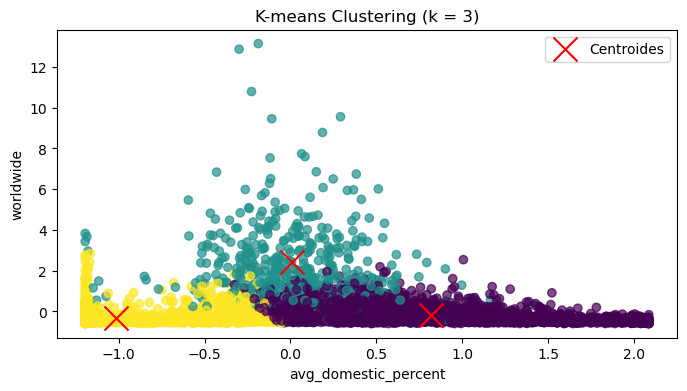

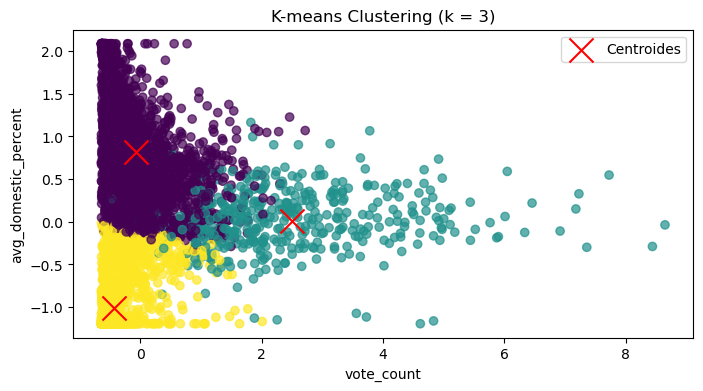

In [17]:
# Optimal number of clusters
optimal_k = 3

# K-means initializer
kmeans = KMeans(n_clusters=optimal_k, random_state=23, n_init=10)
kmeans.fit(data_scaled)

# Retrieve initial labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Function to recalculate centroids
def update_centroids(data, labels, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for c in range(k):
        cluster_points = data[labels == c]
        if len(cluster_points) > 0:
            new_centroids[c] = np.mean(cluster_points, axis=0)
    return new_centroids

# Update centroids until convergence
max_iter = 100000
for _ in range(max_iter):
    new_centroids = update_centroids(data_scaled, labels, optimal_k)
    # Check the convergence
    if np.allclose(centroids, new_centroids, atol=1e-9):  
        break
    centroids = new_centroids
    labels = np.argmin(np.linalg.norm(data_scaled[:, None] - centroids, axis=2), axis=1)

# Visualisation
for c in {(0,1), (0,2), (1,0), (1,4), (2,0), (2,4), (4,1), (4,2)}:
        plt.figure(figsize=(8, 4))
        plt.scatter(data_scaled[:, c[0]], data_scaled[:, c[1]], c=labels, cmap='viridis', alpha=0.7)
        plt.scatter(centroids[:, c[0]], centroids[:, c[1]], s = 300, c='red', marker='x', label='Centroides')
        plt.title('K-means Clustering (k = 3)')
        plt.xlabel(data.columns[c[0]])
        plt.ylabel(data.columns[c[1]])
        plt.legend()
        plt.show()


#### Observations from the Graph  

We can observe from the graph below that **Cluster 2** contains significantly fewer movies than the other two.  
Additionally, the points in **Clusters 0 and 2** are more tightly grouped, whereas in **Cluster 1**, they are more dispersed, suggesting greater heterogeneity within this group.  


Cluster Cardinality:
{0: 2425, 1: 414, 2: 1958}


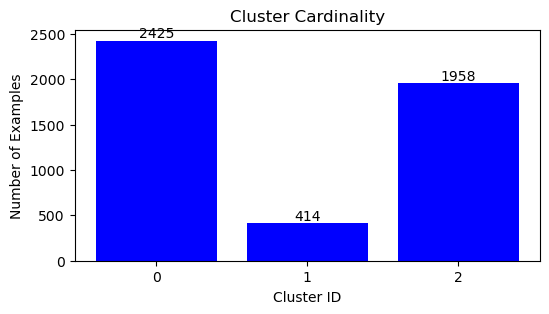

In [18]:
# Count the number of examples in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_cardinality = dict(zip(unique, counts))

# Print the cluster cardinality
print("Cluster Cardinality:")
print(cluster_cardinality)

# Plot the cluster cardinality
plt.figure(figsize=(6, 3))
bars = plt.bar(cluster_cardinality.keys(), cluster_cardinality.values(), color='blue')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Examples')
plt.title('Cluster Cardinality')
plt.xticks(list(cluster_cardinality.keys()))

# Annotate the bars with the number of examples
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), ha='center', va='bottom')

plt.show()

#### Distance Analysis  

We observe that the **sum of the distances** between the points and their centroid is **higher for Clusters 0 and 2**.  
This is logical, as these clusters contain a **larger number of points**, which mechanically increases the overall dispersion.  


Cluster Magnitude:
[3050.0184848660347, 900.0597459672638, 2117.0830591729]


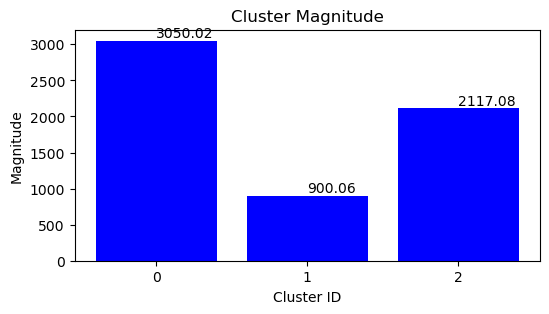

In [19]:
# Calculate the magnitude of each cluster
cluster_magnitude = []
for i in range(optimal_k):
    cluster_points = data_scaled[labels == i]
    centroid = kmeans.cluster_centers_[i]
    magnitude = np.sum(np.linalg.norm(cluster_points - centroid, axis=1))
    cluster_magnitude.append(magnitude)

# Print the cluster magnitude
print("Cluster Magnitude:")
print(cluster_magnitude)

# Plot the cluster magnitude with the values of each magnitude on top of the bars
plt.figure(figsize=(6, 3))
bars = plt.bar(range(optimal_k), cluster_magnitude, color='blue')
plt.xlabel('Cluster ID')
plt.ylabel('Magnitude')
plt.title('Cluster Magnitude')
plt.xticks(range(optimal_k))

# Add the magnitude values on top of the bars
for bar, magnitude in zip(bars, cluster_magnitude):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(magnitude, 2), va='bottom') 

plt.show()

#### Assigning Labels to Clusters  

We can now assign labels to the different clusters based on median or mean values, taking into account the presence of potential outliers.  

##### **Cluster 0: Local successes**  
This cluster is characterized by a **high "avg_domestic_percent"** (average percentage of worldwide revenue generated domestically), while the **"avg_foreign_percent"** (average percentage of worldwide revenue generated in foreign markets) remains relatively low. This suggests that these films achieve success primarily in their domestic market.  

##### **Cluster 1: Blockbusters**  
Films in this cluster have a **very high "worldwide"** (worldwide revenue). Additionally, they receive a **higher number of votes and ratings** compared to other clusters, indicating strong recognition and a large audience.  

##### **Cluster 2: International successes**  
This cluster includes films where the **"avg_foreign_percent"** is close to **100%**, whereas the **"avg_domestic_percent"** is very low (around 5%). These films achieve success mainly in international markets, with only a small portion of their revenue generated domestically.  


In [20]:
# We add labels to the dataframes
df["cluster_id"] = labels

# Numerical columns
col = ['worldwide', 'avg_domestic_percent', 'avg_foreign_percent', 'rating', 'vote_count']
 
print("cluster_id: 0")
print(df[df["cluster_id"] == 0].loc[:, col].mean()) # Local successes
print("\ncluster_id: 1")
print(df[df["cluster_id"] == 1].loc[:, col].median()) # blockbusters
print("\ncluster_id: 2")
print(df[df["cluster_id"] == 2].loc[:, col].mean()) # International successes


cluster_id: 0
worldwide               9.115493e+07
avg_domestic_percent    6.128334e+01
avg_foreign_percent     3.871641e+01
rating                  6.405044e+00
vote_count              2.259749e+03
dtype: float64

cluster_id: 1
worldwide               5.292839e+08
avg_domestic_percent    3.690000e+01
avg_foreign_percent     6.310000e+01
rating                  7.245000e+00
vote_count              1.126700e+04
dtype: float64

cluster_id: 2
worldwide               5.699136e+07
avg_domestic_percent    5.548927e+00
avg_foreign_percent     9.444908e+01
rating                  6.529183e+00
vote_count              8.168412e+02
dtype: float64


In [21]:
def label(n):
    if n == 0:
        return "Local successes"
    elif n == 1:
        return "blockbusters"
    else:
        return "International successes"
    
# We add the labels to the dataframe
df["type of movie"] = df["cluster_id"].apply(label)

#### Displaying Sample Films  
We display **5 films** from each cluster.


In [22]:
print("Local successes: ")
print(df[df["cluster_id"] == 0].iloc[:,:-1].head())
print("\n#blockbusters: ")
print(df[df["cluster_id"] == 1].iloc[:,:-1].head())
print("\n#International successes: ")
print(df[df["cluster_id"] == 2].head())


Local successes: 
     release_group    worldwide  avg_domestic_percent  avg_foreign_percent  \
6            Plane   74515586.0                  43.1                 56.9   
12  Darkness Falls   47488536.0                  68.5                 31.5   
14      Zombieland  102392080.0                  73.8                 26.2   
15            Argo  232325503.0                  58.5                 41.5   
16     Alex & Emma   15368897.0                  92.5                  7.5   

    rating  vote_count  cluster_id  
6    6.950      2236.0           0  
12   5.592       592.0           0  
14   7.261     12276.0           0  
15   7.300      8269.0           0  
16   5.300       201.0           0  

#blockbusters: 
                                        release_group    worldwide  \
9           Three Billboards Outside Ebbing, Missouri  160060063.0   
18                               The Bourne Ultimatum  442824138.0   
34          The Twilight Saga: Breaking Dawn - Part 1  712205856